# **This file is divided into three parts**
# **Part 1: Data cleaning**
# **Part 2: Find the correlation between positions' skills and BPM**
# **Part 3: Draming the aging curve**

### This is the data with traditional and advanced stats

# **Part 1: Data cleaning**

In [ ]:
import pandas as pd
merged_df = pd.read_csv('traditional_advanced_cleaned.csv')

In [ ]:
merged_df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Quincy Acy,PF,22,TOR,29,0,342,42,75,...,15.6,14.7,0.7,0.4,1.1,0.157,-1.0,1.0,0.1,0.2
1,2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,...,13.1,15.6,0.5,0.4,1.0,0.064,-2.1,-0.9,-3.0,-0.2
2,3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,...,12.1,22.5,1.5,0.5,2.0,0.042,-1.1,-1.8,-2.9,-0.5
3,4,Josh Akognon,PG,26,DAL,3,0,9,2,4,...,0.0,20.3,0.0,0.0,0.0,0.196,-3.1,0.1,-3.0,0.0
4,5,Cole Aldrich,C,24,TOT,45,0,388,44,80,...,20.6,12.7,0.1,0.4,0.6,0.070,-3.5,0.6,-2.9,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7222,535,Thaddeus Young,PF,34,TOR,54,9,795,108,198,...,16.7,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4
7223,536,Trae Young,PG,24,ATL,73,73,2541,597,1390,...,15.2,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4
7224,537,Omer Yurtseven,C,24,MIA,9,0,83,16,27,...,11.9,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0
7225,538,Cody Zeller,C,30,MIA,15,2,217,37,59,...,15.8,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0


In [ ]:
# Drop rows where the value in the "Tm" column is "TOT"
merged_df = merged_df[merged_df['Tm'] != 'TOT']

In [ ]:
# This code is just for checking whether "TOT" is removed or not.

rows_with_aaron_brooks = merged_df[merged_df.apply(lambda row: row.astype(str).str.contains('Aaron Brooks').any(), axis=1)]
rows_with_aaron_brooks

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
73,60,Aaron Brooks,PG,28,SAC,46,20,959,139,303,...,16.2,18.0,0.9,0.0,0.9,0.045,-0.7,-1.4,-2.1,0.0
74,60,Aaron Brooks,PG,28,HOU,7,0,38,4,13,...,23.5,19.6,-0.1,0.0,0.0,-0.063,-4.1,0.1,-4.0,0.0
658,65,Aaron Brooks,PG,29,HOU,43,0,716,104,263,...,15.3,20.4,0.6,0.5,1.1,0.076,-0.1,-0.3,-0.4,0.3
659,65,Aaron Brooks,PG,29,DEN,29,12,841,129,318,...,16.2,20.5,0.6,0.4,1.0,0.058,-0.3,-1.2,-1.5,0.1
1258,63,Aaron Brooks,PG,30,CHI,82,21,1885,344,817,...,14.9,25.0,1.7,1.5,3.3,0.083,0.3,-1.1,-0.8,0.5
1900,62,Aaron Brooks,PG,31,CHI,69,0,1108,188,469,...,14.2,22.9,0.2,0.7,0.9,0.040,-1.3,-1.3,-2.6,-0.2
2482,58,Aaron Brooks,PG,32,IND,65,0,894,121,300,...,17.2,19.2,-0.2,0.5,0.3,0.016,-2.4,-1.2,-3.7,-0.4
3087,65,Aaron Brooks,PG,33,MIN,32,1,189,28,69,...,13.0,19.9,0.1,0.1,0.1,0.033,-2.6,-1.3,-3.8,-0.1


In [ ]:
# Turn negative performance into negative numbers
merged_df[['TOV', 'PF', 'TOV%']] *= -1

C:\Users\88693\AppData\Local\Temp\ipykernel_26452\1307631984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[['TOV', 'PF', 'TOV%']] *= -1


In [ ]:
merged_df.head(50)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Quincy Acy,PF,22,TOR,29,0,342,42,75,...,-15.6,14.7,0.7,0.4,1.1,0.157,-1.0,1.0,0.1,0.2
1,2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,...,-13.1,15.6,0.5,0.4,1.0,0.064,-2.1,-0.9,-3.0,-0.2
2,3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,...,-12.1,22.5,1.5,0.5,2.0,0.042,-1.1,-1.8,-2.9,-0.5
3,4,Josh Akognon,PG,26,DAL,3,0,9,2,4,...,-0.0,20.3,0.0,0.0,0.0,0.196,-3.1,0.1,-3.0,0.0
5,5,Cole Aldrich,C,24,HOU,30,0,213,23,43,...,-23.0,12.5,-0.1,0.3,0.2,0.038,-5.6,0.6,-5.0,-0.2
6,5,Cole Aldrich,C,24,SAC,15,0,175,21,37,...,-17.7,12.9,0.2,0.2,0.4,0.109,-1.0,0.5,-0.5,0.1
7,6,LaMarcus Aldridge,PF,27,POR,74,74,2790,638,1318,...,-8.9,26.5,4.8,2.3,7.2,0.124,1.7,-0.4,1.3,2.3
8,7,Lavoy Allen,C,23,PHI,79,37,1669,206,454,...,-10.3,14.8,0.9,1.6,2.5,0.072,-3.0,-0.3,-3.3,-0.6
9,8,Ray Allen*,SG,37,MIA,79,0,2035,292,651,...,-12.5,19.3,3.4,1.9,5.4,0.126,1.1,-0.8,0.3,1.2
10,9,Tony Allen,SG,31,MEM,79,79,2109,284,638,...,-11.5,17.8,1.0,4.1,5.1,0.115,-2.0,2.4,0.4,1.2


### remove missing value

In [ ]:
merged_df.isna().sum() #checking null values

Rk          0
Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
FG          0
FGA         0
FG%        50
3P          0
3PA         0
3P%       603
2P          0
2PA         0
2P%       109
eFG%       50
FT          0
FTA         0
FT%       405
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
PER         1
TS%        48
3PAr       50
FTr        50
ORB%        1
DRB%        1
TRB%        1
AST%        1
STL%        1
BLK%        1
TOV%       41
USG%        1
OWS         0
DWS         0
WS          0
WS/48       1
OBPM        0
DBPM        0
BPM         0
VORP        0
dtype: int64

In [ ]:
df_na = merged_df.dropna() #dropping na values

In [ ]:
df_na.isna().sum() #checking for na again

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
dtype: int64

### check how many column names

In [ ]:
df_na.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP'],
      dtype='object')

In [ ]:
df_na

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Quincy Acy,PF,22,TOR,29,0,342,42,75,...,-15.6,14.7,0.7,0.4,1.1,0.157,-1.0,1.0,0.1,0.2
1,2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,...,-13.1,15.6,0.5,0.4,1.0,0.064,-2.1,-0.9,-3.0,-0.2
2,3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,...,-12.1,22.5,1.5,0.5,2.0,0.042,-1.1,-1.8,-2.9,-0.5
7,6,LaMarcus Aldridge,PF,27,POR,74,74,2790,638,1318,...,-8.9,26.5,4.8,2.3,7.2,0.124,1.7,-0.4,1.3,2.3
8,7,Lavoy Allen,C,23,PHI,79,37,1669,206,454,...,-10.3,14.8,0.9,1.6,2.5,0.072,-3.0,-0.3,-3.3,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7222,535,Thaddeus Young,PF,34,TOR,54,9,795,108,198,...,-16.7,13.5,0.7,1.1,1.8,0.109,-1.8,1.9,0.1,0.4
7223,536,Trae Young,PG,24,ATL,73,73,2541,597,1390,...,-15.2,32.6,5.3,1.4,6.7,0.126,5.3,-2.0,3.3,3.4
7224,537,Omer Yurtseven,C,24,MIA,9,0,83,16,27,...,-11.9,18.0,0.2,0.1,0.3,0.159,-2.5,-1.5,-3.9,0.0
7225,538,Cody Zeller,C,30,MIA,15,2,217,37,59,...,-15.8,18.1,0.4,0.3,0.7,0.147,-2.0,-0.7,-2.8,0.0


In [ ]:
rows_with_aaron_brooks = df_na[merged_df.apply(lambda row: row.astype(str).str.contains('Aaron Brooks').any(), axis=1)]
rows_with_aaron_brooks

C:\Users\88693\AppData\Local\Temp\ipykernel_26452\1506634532.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rows_with_aaron_brooks = df_na[merged_df.apply(lambda row: row.astype(str).str.contains('Aaron Brooks').any(), axis=1)]


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
73,60,Aaron Brooks,PG,28,SAC,46,20,959,139,303,...,-16.2,18.0,0.9,0.0,0.9,0.045,-0.7,-1.4,-2.1,0.0
658,65,Aaron Brooks,PG,29,HOU,43,0,716,104,263,...,-15.3,20.4,0.6,0.5,1.1,0.076,-0.1,-0.3,-0.4,0.3
659,65,Aaron Brooks,PG,29,DEN,29,12,841,129,318,...,-16.2,20.5,0.6,0.4,1.0,0.058,-0.3,-1.2,-1.5,0.1
1258,63,Aaron Brooks,PG,30,CHI,82,21,1885,344,817,...,-14.9,25.0,1.7,1.5,3.3,0.083,0.3,-1.1,-0.8,0.5
1900,62,Aaron Brooks,PG,31,CHI,69,0,1108,188,469,...,-14.2,22.9,0.2,0.7,0.9,0.040,-1.3,-1.3,-2.6,-0.2
2482,58,Aaron Brooks,PG,32,IND,65,0,894,121,300,...,-17.2,19.2,-0.2,0.5,0.3,0.016,-2.4,-1.2,-3.7,-0.4
3087,65,Aaron Brooks,PG,33,MIN,32,1,189,28,69,...,-13.0,19.9,0.1,0.1,0.1,0.033,-2.6,-1.3,-3.8,-0.1


### adjust data   mean traditional and advanced stats and aggregate amount of games

In [ ]:
from scipy.stats import mode

# Define a custom aggregation function to return the most common value (mode)
def most_common(series):
    if not series.empty:
        return mode(series).mode[0]
    else:
        return None

def team_with_max_mp(group):
    return df_na.loc[df_na['MP'].idxmax()]['Tm']

# Group by 'Player' and 'Age', and apply custom aggregations
Q2_df = df_na.groupby(['Player', 'Age'], as_index=False).agg({
    'Rk':'mean',
    'Pos': most_common,  # Position with the mode
    'Tm': team_with_max_mp,  # Team with the max 'Matches Played'
    'G':'sum',
    'GS':'sum',
    'MP': 'sum',  # Sum of 'Matches Played'
    'FG': 'mean', 'FGA': 'mean', 'FG%': 'mean',  '3P': 'mean',
    '3PA': 'mean',  '3P%': 'mean',   '2P': 'mean',  '2PA': 'mean', '2P%': 'mean',  'eFG%': 'mean',
    'FT': 'mean',   'FTA': 'mean',  'FT%': 'mean',  'ORB': 'mean',   'DRB': 'mean',  'TRB': 'mean',
    'AST': 'mean',   'STL': 'mean',  'BLK': 'mean',   'TOV': 'mean',  'PF': 'mean',  'PTS': 'mean' ,

    'PER': 'mean',   'TS%': 'mean', '3PAr': 'mean',  'FTr': 'mean',  'ORB%': 'mean',  'DRB%': 'mean',
    'TRB%': 'mean',  'AST%': 'mean',  'STL%': 'mean',  'BLK%': 'mean',  'TOV%': 'mean',  'USG%': 'mean',
    'OWS': 'mean',
    'DWS': 'mean',
    'WS': 'mean',
    'WS/48': 'mean',
    'OBPM': 'mean',
    'DBPM': 'mean',
    'BPM': 'mean',
    'VORP': 'mean',

    # ... continue for all other numeric columns
})


C:\Users\88693\AppData\Local\Temp\ipykernel_26452\539478656.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(series).mode[0]
C:\Users\88693\AppData\Local\Temp\ipykernel_26452\539478656.py:6: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  return mode(series).mode[0]


In [ ]:
Q2_df

,Player,Age,Rk,Pos,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,A.J. Green,23,174.0,SG,POR,35,1,345,53.0,125.0,...,-6.60,16.6,0.50,0.3,0.8,0.111,-0.3,-0.6,-0.90,0.10
1,A.J. Hammons,24,171.0,C,POR,22,0,163,17.0,42.0,...,-16.40,17.6,-0.20,0.2,0.0,-0.001,-6.6,0.0,-6.60,-0.20
2,A.J. Lawson,22,284.0,SG,POR,14,0,106,21.0,43.0,...,-6.10,21.1,0.10,0.1,0.1,0.057,-1.5,-3.1,-4.60,-0.10
3,A.J. Price,26,344.0,PG,POR,57,22,1278,161.0,413.0,...,-12.70,18.0,1.00,1.2,2.2,0.084,-0.2,-0.4,-0.60,0.50
4,A.J. Price,27,360.0,SG,POR,28,0,99,19.0,46.0,...,-13.00,23.2,-0.10,0.0,0.0,-0.012,-2.4,-2.4,-4.80,-0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5018,Zoran Dragić,25,133.0,SG,POR,16,1,75,5.5,15.0,...,-8.95,26.3,-0.05,0.0,0.0,-0.056,-4.1,-4.4,-8.55,-0.05
5019,Álex Abrines,23,1.0,SG,POR,68,6,1055,134.0,341.0,...,-8.30,15.9,1.20,0.9,2.1,0.096,-1.3,-0.4,-1.60,0.10
5020,Álex Abrines,24,1.0,SG,POR,75,8,1134,115.0,291.0,...,-7.40,12.7,1.30,1.0,2.2,0.094,-1.9,0.4,-1.50,0.10
5021,Álex Abrines,25,1.0,SG,POR,31,2,588,56.0,157.0,...,-7.90,12.2,0.10,0.6,0.6,0.053,-3.7,0.4,-3.30,-0.20


In [ ]:
Q2_df.drop(['Tm'], axis = 1, inplace = True)
#Dropping team name column cuz i couldnt fix it + we dont need it

In [ ]:
Q2_df['Player'].nunique()

1290

### filter player by total minutes

In [ ]:
# Filter out rows where 'MP' is less than 300
filtered_df = Q2_df[Q2_df['MP'] >= 400]

filtered_df

,Player,Age,Rk,Pos,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
3,A.J. Price,26,344.0,PG,57,22,1278,161.0,413.0,0.3900,...,-12.70,18.00,1.0,1.20,2.20,0.084,-0.2,-0.40,-0.60,0.5
6,AJ Griffin,19,182.0,SF,72,12,1401,248.0,533.0,0.4650,...,-7.10,17.90,1.3,0.90,2.20,0.075,-0.3,-0.50,-0.80,0.4
7,Aaron Brooks,28,60.0,PG,46,20,959,139.0,303.0,0.4590,...,-16.20,18.00,0.9,0.00,0.90,0.045,-0.7,-1.40,-2.10,0.0
8,Aaron Brooks,29,65.0,PG,72,12,1557,116.5,290.5,0.4005,...,-15.75,20.45,0.6,0.45,1.05,0.067,-0.2,-0.75,-0.95,0.2
9,Aaron Brooks,30,63.0,PG,82,21,1885,344.0,817.0,0.4210,...,-14.90,25.00,1.7,1.50,3.30,0.083,0.3,-1.10,-0.80,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5017,Zion Williamson,22,527.0,PF,29,29,956,285.0,469.0,0.6080,...,-14.60,30.40,2.3,1.20,3.60,0.180,4.8,1.00,5.80,1.9
5019,Álex Abrines,23,1.0,SG,68,6,1055,134.0,341.0,0.3930,...,-8.30,15.90,1.2,0.90,2.10,0.096,-1.3,-0.40,-1.60,0.1
5020,Álex Abrines,24,1.0,SG,75,8,1134,115.0,291.0,0.3950,...,-7.40,12.70,1.3,1.00,2.20,0.094,-1.9,0.40,-1.50,0.1
5021,Álex Abrines,25,1.0,SG,31,2,588,56.0,157.0,0.3570,...,-7.90,12.20,0.1,0.60,0.60,0.053,-3.7,0.40,-3.30,-0.2


In [ ]:
filtered_df['Player'].nunique()

948

## filter players by total games

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame with columns 'Player' and 'Age'

# Sort the DataFrame by 'Player' and then by 'Age'
Q2dsd_df = Q2_df.sort_values(by=['Player', 'Age'])

# Define a function to check if a player played in consecutive years
def played_consecutive_years(group):
    # Calculate the difference in ages between consecutive rows
    age_diffs = group['Age'].diff()
    # Check if all differences are 1 (which would indicate consecutive years)
    return (age_diffs == 1).all()

# Group by 'Player' and apply the function to filter out players who missed years
consecutive_players = Q2dsd_df.groupby('Player').filter(played_consecutive_years)

# Now 'consecutive_players' will contain only players who played in consecutive years

In [ ]:
fill_df = Q2_df[Q2_df['G'] > 20]

In [ ]:
fill_df['Player'].nunique()

1057

In [ ]:
Q2_df.head(30)

,Player,Age,Rk,Pos,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,A.J. Green,23,174.0,SG,35,1,345,53.0,125.0,0.4240,...,-6.60,16.60,0.50,0.30,0.80,0.1110,-0.30,-0.60,-0.90,0.10
1,A.J. Hammons,24,171.0,C,22,0,163,17.0,42.0,0.4050,...,-16.40,17.60,-0.20,0.20,0.00,-0.0010,-6.60,0.00,-6.60,-0.20
2,A.J. Lawson,22,284.0,SG,14,0,106,21.0,43.0,0.4880,...,-6.10,21.10,0.10,0.10,0.10,0.0570,-1.50,-3.10,-4.60,-0.10
3,A.J. Price,26,344.0,PG,57,22,1278,161.0,413.0,0.3900,...,-12.70,18.00,1.00,1.20,2.20,0.0840,-0.20,-0.40,-0.60,0.50
4,A.J. Price,27,360.0,SG,28,0,99,19.0,46.0,0.4130,...,-13.00,23.20,-0.10,0.00,0.00,-0.0120,-2.40,-2.40,-4.80,-0.10
5,A.J. Price,28,373.0,PG,21,0,280,24.0,61.5,0.3515,...,-8.50,22.85,0.05,0.15,0.20,0.0360,-0.45,-1.05,-1.45,0.05
6,AJ Griffin,19,182.0,SF,72,12,1401,248.0,533.0,0.4650,...,-7.10,17.90,1.30,0.90,2.20,0.0750,-0.30,-0.50,-0.80,0.40
7,Aaron Brooks,28,60.0,PG,46,20,959,139.0,303.0,0.4590,...,-16.20,18.00,0.90,0.00,0.90,0.0450,-0.70,-1.40,-2.10,0.00
8,Aaron Brooks,29,65.0,PG,72,12,1557,116.5,290.5,0.4005,...,-15.75,20.45,0.60,0.45,1.05,0.0670,-0.20,-0.75,-0.95,0.20
9,Aaron Brooks,30,63.0,PG,82,21,1885,344.0,817.0,0.4210,...,-14.90,25.00,1.70,1.50,3.30,0.0830,0.30,-1.10,-0.80,0.50


In [ ]:
df = fill_df.sort_values(by=['Player', 'Age'])

# Define a function that checks for at least one set of consecutive ages and at least one more age
def has_one_set_of_consecutive_ages_plus_one(group):
    # Calculate the difference between consecutive ages
    age_diffs = group['Age'].diff()
    # Check if there is at least one consecutive age (difference of 1)
    has_consecutive = (age_diffs == 1).any()
    # Check if there are at least three unique ages
    has_at_least_three_ages = len(group['Age'].unique()) >= 3
    return has_consecutive and has_at_least_three_ages

# Group by 'Player' and apply the function
new_data = df.groupby('Player').filter(has_one_set_of_consecutive_ages_plus_one)

new_data
# This DataFrame now includes only players who played for at least one set of consecutive ages plus at least one more different age.


,Player,Age,Rk,Pos,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
3,A.J. Price,26,344.0,PG,57,22,1278,161.0,413.0,0.3900,...,-12.70,18.00,1.00,1.20,2.20,0.084,-0.20,-0.40,-0.60,0.50
4,A.J. Price,27,360.0,SG,28,0,99,19.0,46.0,0.4130,...,-13.00,23.20,-0.10,0.00,0.00,-0.012,-2.40,-2.40,-4.80,-0.10
5,A.J. Price,28,373.0,PG,21,0,280,24.0,61.5,0.3515,...,-8.50,22.85,0.05,0.15,0.20,0.036,-0.45,-1.05,-1.45,0.05
7,Aaron Brooks,28,60.0,PG,46,20,959,139.0,303.0,0.4590,...,-16.20,18.00,0.90,0.00,0.90,0.045,-0.70,-1.40,-2.10,0.00
8,Aaron Brooks,29,65.0,PG,72,12,1557,116.5,290.5,0.4005,...,-15.75,20.45,0.60,0.45,1.05,0.067,-0.20,-0.75,-0.95,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016,Zion Williamson,20,528.0,PF,61,61,2026,634.0,1037.0,0.6110,...,-11.60,29.80,7.10,1.60,8.70,0.205,6.10,-0.30,5.80,4.00
5017,Zion Williamson,22,527.0,PF,29,29,956,285.0,469.0,0.6080,...,-14.60,30.40,2.30,1.20,3.60,0.180,4.80,1.00,5.80,1.90
5019,Álex Abrines,23,1.0,SG,68,6,1055,134.0,341.0,0.3930,...,-8.30,15.90,1.20,0.90,2.10,0.096,-1.30,-0.40,-1.60,0.10
5020,Álex Abrines,24,1.0,SG,75,8,1134,115.0,291.0,0.3950,...,-7.40,12.70,1.30,1.00,2.20,0.094,-1.90,0.40,-1.50,0.10


# This is the csv file I use to create age curve

In [ ]:
#new_data.to_csv('age_curve_20games.csv', index = True)

In [ ]:
new_data['Player'].nunique()

651

# Classified according to different playing position

In [ ]:
# Get unique positions
unique_positions = new_data['Pos'].unique()

# Dictionary to hold the sorted dataframes and their mean values grouped by 'Age'
sorted_dfs = {}
mean_dfs = {}

for position in unique_positions:
    # Filter the DataFrame for the current position
    position_df = new_data[new_data['Pos'] == position]

    # Sort the DataFrame by 'Age'
    sorted_df = position_df.sort_values(by='Age')
    sorted_dfs[position] = sorted_df  # Store the sorted DataFrame

    # Group by 'Age' and calculate mean for all columns
    mean_df = sorted_df.groupby('Age').mean()
    mean_dfs[position] = mean_df  # Store the DataFrame with means

# 'sorted_dfs' now contains the sorted DataFrames for each position
# 'mean_dfs' contains the DataFrames with the mean values for each age group per position


C:\Users\88693\AppData\Local\Temp\ipykernel_26452\573784564.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = sorted_df.groupby('Age').mean()
C:\Users\88693\AppData\Local\Temp\ipykernel_26452\573784564.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = sorted_df.groupby('Age').mean()
C:\Users\88693\AppData\Local\Temp\ipykernel_26452\573784564.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


###This part below is for file downloads

### center

In [ ]:
# Access the sorted DataFrame for 'C' centers
centers_sorted_by_age = sorted_dfs['C']

# Access the DataFrame with the mean values for 'C' centers
centers_age_mean = mean_dfs['C']

In [ ]:
centers_sorted_by_age #df with center players with names and sorted by age

,Player,Age,Rk,Pos,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
3574,Myles Turner,19,433.0,C,60,30,1367,264.0,530.0,0.4980,...,-10.30,20.9,0.80,2.3,3.10,0.1090,-2.20,0.60,-1.6,0.10
2176,Jaxson Hayes,19,210.0,C,64,14,1080,174.0,259.0,0.6720,...,-13.40,15.0,2.80,1.1,3.90,0.1710,-0.90,0.60,-0.3,0.50
1830,Isaiah Stewart,19,469.0,C,68,14,1455,226.0,409.0,0.5530,...,-13.00,15.5,1.90,2.1,4.00,0.1320,-1.60,0.50,-1.1,0.30
171,Andre Drummond,19,115.0,C,60,10,1243,208.0,342.0,0.6080,...,-12.20,17.2,2.20,2.3,4.50,0.1720,1.00,1.50,2.5,1.40
4543,Thon Maker,19,281.0,C,57,34,562,83.0,181.0,0.4590,...,-7.70,17.8,0.80,0.5,1.30,0.1130,-1.10,-0.90,-2.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858,Pau Gasol*,37,172.0,C,77,63,1812,287.0,627.0,0.4580,...,-13.10,20.4,2.70,3.3,6.00,0.1590,1.50,1.90,3.4,2.50
3859,Pau Gasol*,38,182.0,C,30,6,360,21.0,47.0,0.3165,...,-17.15,14.1,0.25,0.3,0.55,0.0485,-1.85,1.45,-0.4,0.25
4558,Tim Duncan*,38,137.0,C,77,77,2227,419.0,819.0,0.5120,...,-12.10,22.2,4.90,4.7,9.60,0.2070,2.30,2.80,5.1,4.00
1260,Dirk Nowitzki*,39,372.0,C,77,77,1900,346.0,758.0,0.4560,...,-6.00,20.5,2.60,2.2,4.80,0.1210,1.70,0.60,2.3,2.10


In [ ]:
centers_age_mean #center players mean of all metrics for all ages #age 37

,Rk,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Age,,,,,,,,,,,,,,,,,,,,,
19,261.875000,57.875000,23.500000,1108.375000,186.875000,340.875000,0.549125,8.125000,25.875000,0.274500,...,-11.937500,17.762500,1.562500,1.437500,3.000000,0.125500,-1.137500,0.300000,-0.825000,0.362500
20,233.863636,63.454545,34.500000,1394.318182,245.818182,469.318182,0.511273,18.636364,57.000000,0.261682,...,-12.972727,18.645455,1.968182,1.645455,3.609091,0.114864,-1.104545,0.072727,-1.013636,0.568182
21,234.064516,63.290323,32.129032,1402.548387,240.274194,456.822581,0.518097,18.096774,55.935484,0.199952,...,-13.217742,18.683871,2.083871,1.687097,3.772581,0.122742,-0.783871,0.266129,-0.525806,0.709677
22,259.595238,61.523810,32.500000,1409.095238,249.369048,480.369048,0.524429,21.690476,61.714286,0.286726,...,-13.697619,19.597619,2.273810,1.823810,4.100000,0.133643,-0.053571,0.391667,0.322619,1.020238
23,241.622642,60.056604,32.207547,1365.773585,262.144654,494.289308,0.539226,24.591195,72.628931,0.230969,...,-13.707547,19.583962,2.238050,1.951258,4.196226,0.140925,0.067925,0.648742,0.713208,1.185849
24,260.208333,61.770833,34.979167,1457.666667,271.218750,506.312500,0.545740,18.770833,58.083333,0.232729,...,-13.320833,19.668750,2.772917,2.012500,4.784375,0.150615,0.506250,0.513542,1.012500,1.337500
25,283.666667,61.543860,32.456140,1413.596491,256.263158,477.815789,0.544158,22.219298,62.236842,0.256649,...,-13.392105,19.288596,2.568421,1.746491,4.313158,0.144219,0.292105,0.510526,0.807018,1.181579
26,301.250000,63.288462,33.442308,1483.653846,261.557692,490.413462,0.532913,22.288462,62.701923,0.223500,...,-13.407692,20.095192,2.609615,1.914423,4.519231,0.143750,0.284615,0.552885,0.823077,1.316346
27,275.063830,60.595745,38.021277,1452.212766,266.723404,492.808511,0.547149,18.765957,55.723404,0.194479,...,-14.246809,19.109574,2.606383,2.031915,4.624468,0.144819,0.154255,0.679787,0.850000,1.326596


In [ ]:
centers_age_mean.mean()

Rk        242.570009
G          59.380928
GS         34.305735
MP       1331.625996
FG        231.474502
FGA       445.171689
FG%         0.520380
3P         23.265897
3PA        65.362906
3P%         0.253668
2P        208.208605
2PA       379.808782
2P%         0.547815
eFG%        0.547207
FT        101.991501
FTA       142.299115
FT%         0.713945
ORB       105.717955
DRB       272.435216
TRB       378.153171
AST        96.158502
STL        34.109519
BLK        57.268518
TOV       -73.648473
PF       -129.794856
PTS       588.206403
PER        17.194719
TS%         0.576945
3PAr        0.154411
FTr         0.327786
ORB%        9.068211
DRB%       22.772149
TRB%       15.947774
AST%       10.931675
STL%        1.288287
BLK%        3.654604
TOV%      -13.425268
USG%       18.861548
OWS         2.072057
DWS         1.869977
WS          3.941988
WS/48       0.134912
OBPM       -0.148191
DBPM        0.748689
BPM         0.598199
VORP        1.113173
dtype: float64

In [ ]:
centers_sorted_by_age.mean()

C:\Users\88693\AppData\Local\Temp\ipykernel_26452\395886491.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  centers_sorted_by_age.mean()


Age        26.845161
Rk        259.777419
G          60.266129
GS         33.822581
MP       1373.133871
FG        242.501882
FGA       459.842473
FG%         0.531422
3P         21.679570
3PA        62.723118
3P%         0.240387
2P        220.822312
2PA       397.119355
2P%         0.562746
eFG%        0.555320
FT        109.750269
FTA       154.273387
FT%         0.710109
ORB       117.615323
DRB       278.807527
TRB       396.422849
AST        94.713172
STL        35.593817
BLK        56.888710
TOV       -78.126344
PF       -137.037097
PTS       616.433602
PER        17.613280
TS%         0.584746
3PAr        0.141720
FTr         0.338532
ORB%        9.793118
DRB%       22.535081
TRB%       16.167285
AST%       10.560699
STL%        1.314892
BLK%        3.606962
TOV%      -13.559839
USG%       19.135000
OWS         2.223575
DWS         1.839301
WS          4.062258
WS/48       0.137600
OBPM       -0.055968
DBPM        0.556909
BPM         0.499355
VORP        1.079839
dtype: float6

In [ ]:
centers_sorted_by_age_sorted_by_ast.describe()

,Age,Rk,G,BPM,GS,MP,FG,FGA,FG%,3P,...,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,VORP
count,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,...,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,26.845161,259.777419,60.266129,0.499355,33.822581,1373.133871,242.501882,459.842473,0.531422,21.679570,...,3.606962,-13.559839,19.135000,2.223575,1.839301,4.062258,0.137600,-0.055968,0.556909,1.079839
std,4.289058,151.840349,16.373226,2.736285,29.111242,686.963213,164.476097,315.248718,0.070127,35.193464,...,1.693844,3.894027,5.100695,1.987431,1.239452,2.967073,0.050422,2.301749,1.180616,1.405737
min,19.000000,1.000000,22.000000,-8.900000,0.000000,128.000000,11.000000,24.000000,0.316500,0.000000,...,0.000000,-33.400000,7.300000,-0.900000,0.000000,-0.200000,-0.019000,-8.100000,-2.600000,-1.000000
25%,23.000000,143.750000,48.000000,-1.262500,4.750000,808.750000,112.750000,205.000000,0.480000,0.000000,...,2.400000,-15.700000,15.575000,0.787500,0.850000,1.700000,0.105000,-1.500000,-0.212500,0.100000
50%,26.000000,261.000000,64.000000,0.400000,27.500000,1325.500000,202.000000,382.500000,0.523000,3.000000,...,3.400000,-13.200000,18.300000,1.700000,1.600000,3.400000,0.136000,-0.200000,0.500000,0.700000
75%,30.000000,377.250000,74.000000,2.000000,63.000000,1906.000000,355.500000,656.500000,0.575000,28.250000,...,4.412500,-10.900000,22.200000,3.200000,2.600000,5.900000,0.171000,1.300000,1.262500,1.700000
max,39.000000,604.000000,82.000000,13.700000,82.000000,3030.000000,802.000000,1526.000000,0.765000,187.000000,...,9.700000,-4.500000,37.200000,12.200000,6.600000,15.600000,0.308000,9.200000,5.000000,9.800000


In [ ]:
#centers_sorted_by_age.to_csv('Centersnew2.csv', index = False)

### powerforward

In [ ]:
# Access the sorted DataFrame for 'PF' Power Forward
powerforward_sorted_by_age = sorted_dfs['PF']

# Access the DataFrame with the mean values for 'PF' Power Forward
powerforward_age_mean = mean_dfs['PF']

In [ ]:
powerforward_sorted_by_age

,Player,Age,Rk,Pos,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
13,Aaron Gordon,19,177.0,PF,47,8,797,93.0,208.0,0.447,...,-13.9,15.5,0.3,0.7,1.0,0.060,-2.6,-0.1,-2.7,-0.2
1312,Dragan Bender,19,41.0,PF,43,0,574,57.0,161.0,0.354,...,-16.2,14.4,-0.7,0.3,-0.3,-0.029,-4.3,-0.7,-5.1,-0.4
1931,Jabari Parker,19,357.0,PF,25,25,738,129.0,263.0,0.490,...,-13.9,20.7,0.4,1.0,1.3,0.088,-0.1,-0.4,-0.5,0.3
2119,Jaren Jackson Jr.,19,255.0,PF,58,56,1515,298.0,589.0,0.506,...,-12.7,22.8,1.2,2.2,3.3,0.105,-1.2,1.0,-0.3,0.7
2817,Kevin Knox,19,285.0,PF,75,57,2158,338.0,914.0,0.370,...,-10.1,22.3,-2.2,0.9,-1.3,-0.030,-3.4,-2.3,-5.7,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,Dirk Nowitzki*,38,332.0,PF,54,54,1424,296.0,678.0,0.437,...,-6.6,25.8,0.6,1.9,2.5,0.084,0.8,0.1,0.8,1.0
2811,Kevin Garnett*,39,149.0,PF,38,38,556,54.0,115.0,0.470,...,-11.4,11.3,0.4,0.7,1.1,0.092,-1.6,3.1,1.5,0.5
1261,Dirk Nowitzki*,40,378.0,PF,51,20,795,135.0,376.0,0.359,...,-4.3,22.5,-0.5,0.8,0.3,0.016,-2.7,-1.2,-3.9,-0.4
4848,Vince Carter,42,92.0,PF,76,9,1330,196.0,468.0,0.419,...,-8.8,16.7,1.2,0.7,1.9,0.070,-0.4,-0.3,-0.7,0.5


In [ ]:
powerforward_age_mean # for powerforward mean metrics #age 38

,Rk,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Age,,,,,,,,,,,,,,,,,,,,,
19,233.307692,50.692308,27.000000,1127.538462,190.230769,420.076923,0.444538,35.000000,110.076923,0.293308,...,-12.507692,19.884615,0.269231,1.092308,1.361538,0.057154,-1.553846,-0.523077,-2.092308,0.015385
20,272.923077,59.346154,29.692308,1278.730769,207.846154,445.269231,0.457192,35.653846,108.115385,0.303115,...,-12.415385,18.257692,0.938462,1.246154,2.188462,0.073500,-1.703846,-0.380769,-2.084615,0.238462
21,302.275000,58.025000,30.700000,1326.500000,221.662500,479.000000,0.462113,38.250000,115.275000,0.263450,...,-11.987500,19.462500,1.136250,1.367500,2.510000,0.081488,-1.280000,-0.477500,-1.756250,0.356250
22,300.433962,55.716981,27.075472,1262.962264,208.132075,435.009434,0.478396,40.113208,117.254717,0.290189,...,-11.932075,18.854717,1.225472,1.325472,2.553774,0.094198,-0.862264,-0.120755,-0.985849,0.503774
23,303.666667,60.233333,27.416667,1382.683333,219.400000,455.708333,0.463800,41.491667,123.983333,0.290258,...,-11.448333,18.878333,1.590000,1.430000,3.017500,0.097342,-0.703333,-0.092500,-0.795000,0.682500
24,258.814286,60.914286,24.985714,1391.657143,236.185714,489.207143,0.463643,44.664286,129.571429,0.298793,...,-10.757143,19.107143,1.765714,1.515714,3.282143,0.100614,-0.602143,-0.136429,-0.741429,0.819286
25,267.323077,61.061538,28.984615,1432.492308,239.615385,505.015385,0.473269,51.384615,145.400000,0.298462,...,-10.909231,19.260769,1.801538,1.531538,3.336923,0.111446,0.036923,-0.013846,0.020000,0.935385
26,249.446429,61.428571,34.375000,1531.535714,227.047619,480.738095,0.462030,52.892857,149.723214,0.315387,...,-11.694643,19.206548,1.685714,1.544345,3.230357,0.102140,-0.241964,0.176488,-0.075298,0.910417
27,225.611940,63.179104,34.417910,1599.059701,260.328358,554.194030,0.461649,57.932836,162.149254,0.299493,...,-11.317164,19.105224,1.871642,1.650746,3.522388,0.103187,-0.032090,-0.018657,-0.055970,0.967910


In [ ]:
#powerforward_sorted_by_age.to_csv('Powerforwardnew2.csv', index = False)

### smallforward

In [ ]:
# Access the sorted DataFrame for 'SF' Small Forward
smallforward_sorted_by_age = sorted_dfs['SF']

# Access the DataFrame with the mean values for 'SF' Small Forward
smallforward_age_mean = mean_dfs['SF']

In [ ]:
#smallforward_sorted_by_age.to_csv('Smallforwardnew2.csv', index = False)

### pointguard

In [ ]:
# Access the sorted DataFrame for 'PG' Point Guard
pointguard_age_mean_sorted_by_age = sorted_dfs['PG']

# Access the DataFrame with the mean values for 'PG' Point Guard
pointguard_age_mean = mean_dfs['PG']

In [ ]:
#pointguard_age_mean_sorted_by_age.to_csv('Pointguardnew2.csv', index = False)

### shootingguard

In [ ]:
# Access the sorted DataFrame for 'SG' shooting guard
shootingguard_age_mean_sorted_by_age = sorted_dfs['SG']

# Access the DataFrame with the mean values for 'SG' shooting guard
shootingguard_age_mean = mean_dfs['SG']

In [ ]:
#shootingguard_age_mean_sorted_by_age.to_csv('Shootingguardnew2.csv', index = True)

# **Part 2: Find the correlation between different positions' skills and BPM**

# Correlation for different position

### center

In [ ]:
# List of columns to exclude
exclude_columns = ['OBPM', 'DBPM', 'VORP', 'PER', 'WS/48', 'WS', 'OWS', 'DWS',
                   'MP', 'eFG%', 'GS', 'USG%', 'G', 'Age', 'Rk']

# Get correlations for BPM and exclude specified columns
correlations_bpm_filtered = centers_sorted_by_age.drop(columns=exclude_columns).corr()['BPM'].sort_values(ascending=False)

# Remove the correlation of BPM with itself
correlations_bpm_filtered = correlations_bpm_filtered.drop('BPM')

# Extract the top 10 correlations
top_10_correlations_filtered = correlations_bpm_filtered.head(10)

# Print the top 10 correlations and their values
print("Top 10 Correlations for BPM (excluding specified columns):")
print(top_10_correlations_filtered)




Top 10 Correlations for BPM (excluding specified columns):
AST     0.673443
PTS     0.637393
FG      0.611799
AST%    0.610637
FT      0.599330
FGA     0.575340
DRB     0.564777
STL     0.562870
2P      0.562573
FTA     0.557863
Name: BPM, dtype: float64


C:\Users\88693\AppData\Local\Temp\ipykernel_26452\2220090737.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_bpm_filtered = centers_sorted_by_age.drop(columns=exclude_columns).corr()['BPM'].sort_values(ascending=False)


#### just check if remove common metric

In [ ]:
# List of columns to exclude
exclude_columns = ['OBPM', 'DBPM', 'VORP', 'PER', 'WS/48', 'WS', 'OWS', 'DWS',
                   'MP', 'eFG%', 'GS', 'USG%', 'G', 'Age', 'Rk',
                   'PTS', 'FG','FGA', 'TS%', '3PAr', 'FG%', 'FT%', 'FTr',
                  'AST%', 'DRB%', 'STL%', 'TOV%', 'TRB%', 'BLK%', 'ORB%']

# Get correlations for BPM and exclude specified columns
correlations_bpm_filtered = centers_sorted_by_age.drop(columns=exclude_columns).corr()['BPM'].sort_values(ascending=False)

# Remove the correlation of BPM with itself
correlations_bpm_filtered = correlations_bpm_filtered.drop('BPM')

# Extract the top 10 correlations
top_10_correlations_filtered = correlations_bpm_filtered.head(10)

# Print the top 10 correlations and their values
print("Top 10 Correlations for BPM (excluding specified columns):")
print(top_10_correlations_filtered)

Top 10 Correlations for BPM (excluding specified columns):
AST    0.673443
FT     0.599330
DRB    0.564777
STL    0.562870
2P     0.562573
FTA    0.557863
TRB    0.518961
2PA    0.512325
BLK    0.421342
3P     0.375263
Name: BPM, dtype: float64


C:\Users\88693\AppData\Local\Temp\ipykernel_26452\1246108785.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_bpm_filtered = centers_sorted_by_age.drop(columns=exclude_columns).corr()['BPM'].sort_values(ascending=False)


### powerforward

In [ ]:
# List of columns to exclude
exclude_columns_pf = ['OBPM', 'DBPM', 'VORP', 'PER', 'WS/48', 'WS', 'OWS', 'DWS',
                   'MP', 'eFG%', 'GS', 'USG%', 'G', 'Age', 'Rk']

# Get correlations for BPM and exclude specified columns
correlations_bpm_filtered_pf = powerforward_sorted_by_age .drop(columns=exclude_columns_pf).corr()['BPM'].sort_values(ascending=False)

# Remove the correlation of BPM with itself
correlations_bpm_filtered_pf = correlations_bpm_filtered_pf.drop('BPM')

# Extract the top 10 correlations
top_10_correlations_filtered_pf = correlations_bpm_filtered_pf.head(10)

# Print the top 10 correlations and their values
print("Top 10 Correlations for BPM (excluding specified columns) for Power Forward:")
print(top_10_correlations_filtered_pf)


Top 10 Correlations for BPM (excluding specified columns) for Power Forward:
PTS     0.679200
FT      0.668584
FTA     0.666351
FG      0.665756
AST     0.647736
2P      0.629157
AST%    0.615036
FGA     0.613970
DRB     0.611872
TS%     0.605955
Name: BPM, dtype: float64


C:\Users\88693\AppData\Local\Temp\ipykernel_26452\725064029.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_bpm_filtered_pf = powerforward_sorted_by_age .drop(columns=exclude_columns_pf).corr()['BPM'].sort_values(ascending=False)


#### just check if remove common metric

In [ ]:
# List of columns to exclude
exclude_columns_pf = ['OBPM', 'DBPM', 'VORP', 'PER', 'WS/48', 'WS', 'OWS', 'DWS',
                   'MP', 'eFG%', 'GS', 'USG%', 'G', 'Age', 'Rk',
                   'PTS', 'FG','FGA', 'TS%', '3PAr', 'FG%', 'FT%', 'FTr',
                  'AST%', 'DRB%', 'STL%', 'TOV%', 'TRB%', 'BLK%', 'ORB%']

# Get correlations for BPM and exclude specified columns
correlations_bpm_filtered_pf = powerforward_sorted_by_age .drop(columns=exclude_columns_pf).corr()['BPM'].sort_values(ascending=False)

# Remove the correlation of BPM with itself
correlations_bpm_filtered_pf = correlations_bpm_filtered_pf.drop('BPM')

# Extract the top 10 correlations
top_10_correlations_filtered_pf = correlations_bpm_filtered_pf.head(10)

# Print the top 10 correlations and their values
print("Top 10 Correlations for BPM (excluding specified columns) for Power Forward:")
print(top_10_correlations_filtered_pf)

Top 10 Correlations for BPM (excluding specified columns) for Power Forward:
FT     0.668584
FTA    0.666351
AST    0.647736
2P     0.629157
DRB    0.611872
2PA    0.580973
TRB    0.580799
STL    0.553909
BLK    0.454985
ORB    0.388044
Name: BPM, dtype: float64


C:\Users\88693\AppData\Local\Temp\ipykernel_26452\2415474909.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_bpm_filtered_pf = powerforward_sorted_by_age .drop(columns=exclude_columns_pf).corr()['BPM'].sort_values(ascending=False)


### smallforward

In [ ]:
# List of columns to exclude
exclude_columns_sf = ['OBPM', 'DBPM', 'VORP', 'PER', 'WS/48', 'WS', 'OWS', 'DWS',
                   'MP', 'eFG%', 'GS', 'USG%', 'G', 'Age', 'Rk']

# Get correlations for BPM and exclude specified columns
correlations_bpm_filtered_sf = smallforward_sorted_by_age.drop(columns=exclude_columns_sf).corr()['BPM'].sort_values(ascending=False)

# Remove the correlation of BPM with itself
correlations_bpm_filtered_sf = correlations_bpm_filtered_sf.drop('BPM')

# Extract the top 10 correlations
top_10_correlations_filtered_sf = correlations_bpm_filtered_sf.head(10)

# Print the top 10 correlations and their values
print("Top 10 Correlations for BPM (excluding specified columns) for Small Forward:")
print(top_10_correlations_filtered_sf)


Top 10 Correlations for BPM (excluding specified columns) for Small Forward:
AST     0.634056
PTS     0.629606
TS%     0.627092
FT      0.625946
FG      0.610391
FTA     0.608425
DRB     0.601360
AST%    0.585692
TRB     0.578126
2P      0.573222
Name: BPM, dtype: float64


C:\Users\88693\AppData\Local\Temp\ipykernel_26452\3952774020.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_bpm_filtered_sf = smallforward_sorted_by_age.drop(columns=exclude_columns_sf).corr()['BPM'].sort_values(ascending=False)


#### just check if remove common metric

In [ ]:
# List of columns to exclude
exclude_columns_sf = ['OBPM', 'DBPM', 'VORP', 'PER', 'WS/48', 'WS', 'OWS', 'DWS',
                   'MP', 'eFG%', 'GS', 'USG%', 'G', 'Age', 'Rk',
                   'PTS', 'FG','FGA', 'TS%', '3PAr', 'FG%', 'FT%', 'FTr',
                  'AST%', 'DRB%', 'STL%', 'TOV%', 'TRB%', 'BLK%', 'ORB%']

# Get correlations for BPM and exclude specified columns
correlations_bpm_filtered_sf = smallforward_sorted_by_age.drop(columns=exclude_columns_sf).corr()['BPM'].sort_values(ascending=False)

# Remove the correlation of BPM with itself
correlations_bpm_filtered_sf = correlations_bpm_filtered_sf.drop('BPM')

# Extract the top 10 correlations
top_10_correlations_filtered_sf = correlations_bpm_filtered_sf.head(10)

# Print the top 10 correlations and their values
print("Top 10 Correlations for BPM (excluding specified columns) for Small Forward:")
print(top_10_correlations_filtered_sf)

Top 10 Correlations for BPM (excluding specified columns) for Small Forward:
AST    0.634056
FT     0.625946
FTA    0.608425
DRB    0.601360
TRB    0.578126
2P     0.573222
STL    0.567348
2PA    0.532519
3P     0.468251
BLK    0.462951
Name: BPM, dtype: float64


C:\Users\88693\AppData\Local\Temp\ipykernel_26452\3288623336.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_bpm_filtered_sf = smallforward_sorted_by_age.drop(columns=exclude_columns_sf).corr()['BPM'].sort_values(ascending=False)


### pointguard

In [ ]:
# List of columns to exclude
exclude_columns_pg = ['OBPM', 'DBPM', 'VORP', 'PER', 'WS/48', 'WS', 'OWS', 'DWS',
                   'MP', 'eFG%', 'GS', 'USG%', 'G', 'Age', 'Rk']

# Get correlations for BPM and exclude specified columns
correlations_bpm_filtered_pg = pointguard_age_mean_sorted_by_age.drop(columns=exclude_columns_pg).corr()['BPM'].sort_values(ascending=False)

# Remove the correlation of BPM with itself
correlations_bpm_filtered_pg = correlations_bpm_filtered_pg.drop('BPM')

# Extract the top 10 correlations
top_10_correlations_filtered_pg = correlations_bpm_filtered_pg.head(10)

# Print the top 10 correlations and their values
print("Top 10 Correlations for BPM (excluding specified columns) for Point Guard:")
print(top_10_correlations_filtered_pg)


Top 10 Correlations for BPM (excluding specified columns) for Point Guard:
PTS    0.746067
FG     0.724751
FT     0.712229
FTA    0.702325
FGA    0.691330
TS%    0.684520
AST    0.667792
DRB    0.661881
TRB    0.657205
3P     0.651998
Name: BPM, dtype: float64


C:\Users\88693\AppData\Local\Temp\ipykernel_26452\1229333845.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_bpm_filtered_pg = pointguard_age_mean_sorted_by_age.drop(columns=exclude_columns_pg).corr()['BPM'].sort_values(ascending=False)


#### just check if remove common metric

In [ ]:
# List of columns to exclude
exclude_columns_pg = ['OBPM', 'DBPM', 'VORP', 'PER', 'WS/48', 'WS', 'OWS', 'DWS',
                   'MP', 'eFG%', 'GS', 'USG%', 'G', 'Age', 'Rk',
                   'PTS', 'FG','FGA', 'TS%', '3PAr', 'FG%', 'FT%', 'FTr',
                  'AST%', 'DRB%', 'STL%', 'TOV%', 'TRB%', 'BLK%', 'ORB%']

# Get correlations for BPM and exclude specified columns
correlations_bpm_filtered_pg = pointguard_age_mean_sorted_by_age.drop(columns=exclude_columns_pg).corr()['BPM'].sort_values(ascending=False)

# Remove the correlation of BPM with itself
correlations_bpm_filtered_pg = correlations_bpm_filtered_pg.drop('BPM')

# Extract the top 10 correlations
top_10_correlations_filtered_pg = correlations_bpm_filtered_pg.head(10)

# Print the top 10 correlations and their values
print("Top 10 Correlations for BPM (excluding specified columns) for Point Guard:")
print(top_10_correlations_filtered_pg)

Top 10 Correlations for BPM (excluding specified columns) for Point Guard:
FT     0.712229
FTA    0.702325
AST    0.667792
DRB    0.661881
TRB    0.657205
3P     0.651998
2P     0.650718
3PA    0.640391
STL    0.625666
2PA    0.610616
Name: BPM, dtype: float64


C:\Users\88693\AppData\Local\Temp\ipykernel_26452\2906345149.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_bpm_filtered_pg = pointguard_age_mean_sorted_by_age.drop(columns=exclude_columns_pg).corr()['BPM'].sort_values(ascending=False)


### shootinggurad

In [ ]:
# List of columns to exclude
exclude_columns_sg = ['OBPM', 'DBPM', 'VORP', 'PER', 'WS/48', 'WS', 'OWS', 'DWS',
                   'MP', 'eFG%', 'GS', 'USG%', 'G', 'Age', 'Rk']

# Get correlations for BPM and exclude specified columns
correlations_bpm_filtered_sg = shootingguard_age_mean_sorted_by_age.drop(columns=exclude_columns_sg).corr()['BPM'].sort_values(ascending=False)

# Remove the correlation of BPM with itself
correlations_bpm_filtered_sg = correlations_bpm_filtered_sg.drop('BPM')

# Extract the top 10 correlations
top_10_correlations_filtered_sg = correlations_bpm_filtered_sg.head(10)

# Print the top 10 correlations and their values
print("Top 10 Correlations for BPM (excluding specified columns) for Shooting Guard:")
print(top_10_correlations_filtered_sg)


Top 10 Correlations for BPM (excluding specified columns) for Shooting Guard:
PTS    0.638057
TS%    0.625892
FG     0.613520
FT     0.605001
AST    0.597204
FTA    0.594375
STL    0.591497
FGA    0.579882
TRB    0.569090
FG%    0.567925
Name: BPM, dtype: float64


C:\Users\88693\AppData\Local\Temp\ipykernel_26452\2492391529.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_bpm_filtered_sg = shootingguard_age_mean_sorted_by_age.drop(columns=exclude_columns_sg).corr()['BPM'].sort_values(ascending=False)


#### just check if remove common metric

In [ ]:
# List of columns to exclude
exclude_columns_sg = ['OBPM', 'DBPM', 'VORP', 'PER', 'WS/48', 'WS', 'OWS', 'DWS',
                   'MP', 'eFG%', 'GS', 'USG%', 'G', 'Age', 'Rk',
                   'PTS', 'FG','FGA', 'TS%', '3PAr', 'FG%', 'FT%', 'FTr',
                  'AST%', 'DRB%', 'STL%', 'TOV%', 'TRB%', 'BLK%', 'ORB%']

# Get correlations for BPM and exclude specified columns
correlations_bpm_filtered_sg = shootingguard_age_mean_sorted_by_age.drop(columns=exclude_columns_sg).corr()['BPM'].sort_values(ascending=False)

# Remove the correlation of BPM with itself
correlations_bpm_filtered_sg = correlations_bpm_filtered_sg.drop('BPM')

# Extract the top 10 correlations
top_10_correlations_filtered_sg = correlations_bpm_filtered_sg.head(10)

# Print the top 10 correlations and their values
print("Top 10 Correlations for BPM (excluding specified columns) for Shooting Guard:")
print(top_10_correlations_filtered_sg)

Top 10 Correlations for BPM (excluding specified columns) for Shooting Guard:
FT     0.605001
AST    0.597204
FTA    0.594375
STL    0.591497
TRB    0.569090
DRB    0.564344
2P     0.552252
2PA    0.518712
3P     0.514298
3PA    0.496582
Name: BPM, dtype: float64


C:\Users\88693\AppData\Local\Temp\ipykernel_26452\3116099374.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_bpm_filtered_sg = shootingguard_age_mean_sorted_by_age.drop(columns=exclude_columns_sg).corr()['BPM'].sort_values(ascending=False)


# correlation ranking

|  Rank      | Center | Power Forward | Small Forward | Point Guard | Shooting Guard |
|--------|--------|---------------|---------------|-------------|----------------|
|  1      | AST    | PTS           | AST           | PTS         | PTS           |
|    2    | PTS    | FT            | PTS           | FG          | TS%           |
|     3   | FG     | FTA           | TS%           | FT          | FG            |
|    4    | AST%   | FG            | FT            | FTA         | FT            |
|   5     | FT     | AST           | FG            | FGA         | AST           |
|    6    | FGA    | 2P            | FTA           | TS%         | FTA           |
|    7    | DRB    | AST%          | DRB           | AST         | STL           |
|    8    | STL    | FGA           | AST%          | DRB         | FGA           |
|    9    | 2P     | DRB           | TRB           | TRB         | TRB           |
|     10  | FTA    | TS%           | 2P            | 3P          | FG%           |


## ranking without common metrics

|   Rank     | Center | Power Forward | Small Forward | Point Guard | Shooting Guard |
|--------|--------|---------------|---------------|-------------|----------------|
|   1     | AST   | FT            | AST           | FT          | FT             |
|   2     | FT    | FTA           | FT            | FTA         | AST            |
|   3     | DRB   | AST           | FTA           | AST         | FTA            |
|   4     | STL   | 2P            | DRB           | DRB         | STL            |
|   5     |   2P  | DRB           | TRB           | TRB         | TRB            |
|   6     | FTA   | 2PA           | 2P            | 3P          | DRB            |
|   7     | TRB   | TRB           | STL           | 2P          | 2P             |
|   8     | 2PA   | STL           | 2PA           | 3PA         | 2PA            |
|   9     | BLK   | BLK           | 3P            | STL         | 3P             |
|   10    | 3P    | ORB           | BLK           | 2PA         | 3PA            |


# **Part 3: Draming the aging curve**

#  Aging curve for the entire league in BPM

In [ ]:
from google.colab import drive
drive.mount('/drive')

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

Mounted at /drive


In [ ]:
merged_df = pd.read_csv('../drive/MyDrive/Colab Notebooks/sports_hw/age_curve_20games.csv')

In [ ]:
# Sort the DataFrame by player and age to ensure that the deltas are calculated correctly
df = merged_df.sort_values(by=['Player', 'Age'])

In [ ]:
df.head()

,Unnamed: 0,Player,Age,Rk,Pos,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,3,A.J. Price,26,344.0,PG,57,22,1278,161.0,413.0,...,12.70,18.00,1.00,1.20,2.20,0.084,-0.20,-0.40,-0.60,0.50
1,4,A.J. Price,27,360.0,SG,28,0,99,19.0,46.0,...,13.00,23.20,-0.10,0.00,0.00,-0.012,-2.40,-2.40,-4.80,-0.10
2,5,A.J. Price,28,373.0,PG,21,0,280,24.0,61.5,...,8.50,22.85,0.05,0.15,0.20,0.036,-0.45,-1.05,-1.45,0.05
3,7,Aaron Brooks,28,60.0,PG,46,20,959,139.0,303.0,...,16.20,18.00,0.90,0.00,0.90,0.045,-0.70,-1.40,-2.10,0.00
4,8,Aaron Brooks,29,65.0,PG,72,12,1557,116.5,290.5,...,15.75,20.45,0.60,0.45,1.05,0.067,-0.20,-0.75,-0.95,0.20


# BPM

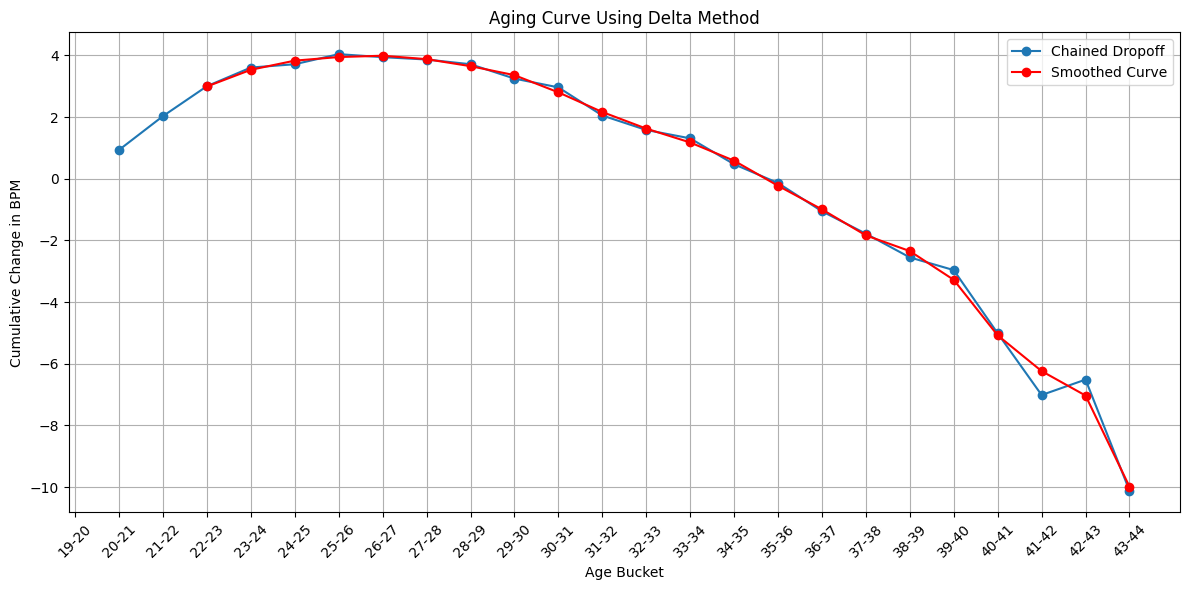

,Age_Bucket,BPM_Delta,Chained_Dropoff,Smoothed_Chained_Dropoff
0,19-20,NaN,NaN,NaN
1,20-21,0.933962,0.933962,NaN
2,21-22,1.096241,2.030203,NaN
3,22-23,0.969505,2.999708,2.990728
4,23-24,0.604973,3.604681,3.531843
5,24-25,0.107414,3.712095,3.828686
6,25-26,0.326610,4.038705,3.945309
7,26-27,-0.097661,3.941045,3.987815
8,27-28,-0.075779,3.865265,3.876850
9,28-29,-0.153397,3.711868,3.649455


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Calculate BPM Delta for each player
df['BPM_Delta'] = df.groupby('Player')['BPM'].diff()

# Create Age Buckets that show the age going into the age
# For example, a player's transition from 19 to 20 will have a bucket '19-20'
df['Age_Bucket'] = df['Age'].astype(str) + '-' + (df['Age'] + 1).astype(str)

# Calculate average Delta per Bucket
bucket_averages = df.groupby('Age_Bucket')['BPM_Delta'].mean().reset_index()

# Calculate the cumulative sum of the average BPM deltas
bucket_averages['Chained_Dropoff'] = bucket_averages['BPM_Delta'].cumsum()

# Now let's handle the smoothing
window_length = 5  # Choose a window length that makes sense for your data, must be odd
polyorder = 3  # Choose a polynomial order that makes sense for your data

# Ensure that we have enough points to apply the smoothing filter
if len(bucket_averages) >= window_length:
    bucket_averages['Smoothed_Chained_Dropoff'] = savgol_filter(bucket_averages['Chained_Dropoff'], window_length, polyorder)
else:
    bucket_averages['Smoothed_Chained_Dropoff'] = bucket_averages['Chained_Dropoff']

# Plot the Aging Curve
plt.figure(figsize=(12, 6))
plt.plot(bucket_averages['Age_Bucket'], bucket_averages['Chained_Dropoff'], marker='o', linestyle='-', label='Chained Dropoff')
plt.plot(bucket_averages['Age_Bucket'], bucket_averages['Smoothed_Chained_Dropoff'], marker='o', linestyle='-', color='red', label='Smoothed Curve')
plt.xlabel('Age Bucket')
plt.ylabel('Cumulative Change in BPM')
plt.title('Aging Curve Using Delta Method')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Ensure everything fits without overlapping
plt.legend()
plt.show()

# Display the first few rows of bucket_averages to confirm the '19-20' bucket is included
bucket_averages

#OBPM

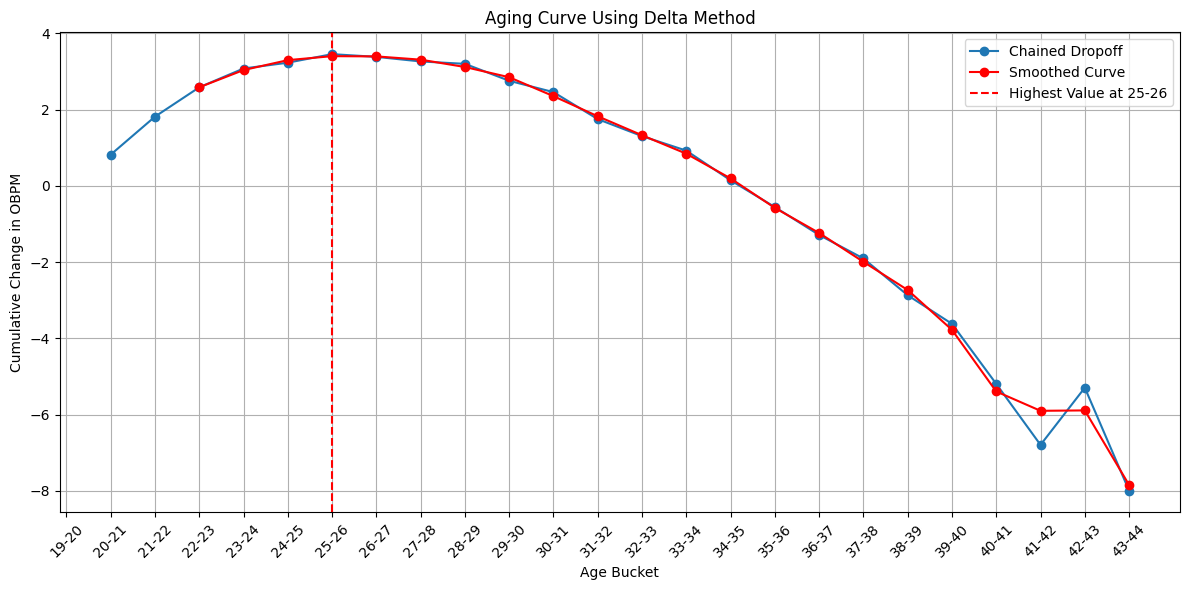

,Age_Bucket,OBPM_Delta,Chained_Dropoff,Smoothed_Chained_Dropoff
0,19-20,NaN,NaN,NaN
1,20-21,0.820755,0.820755,NaN
2,21-22,0.996617,1.817371,NaN
3,22-23,0.769231,2.586602,2.588001
4,23-24,0.493481,3.080083,3.039315
5,24-25,0.153046,3.233129,3.299635
6,25-26,0.223559,3.456689,3.404393
7,26-27,-0.070877,3.385811,3.397703
8,27-28,-0.120144,3.265667,3.312385
9,28-29,-0.062981,3.202687,3.119844


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Calculate BPM Delta for each player
df['OBPM_Delta'] = df.groupby('Player')['OBPM'].diff()

# Create Age Buckets that show the age going into the age
# For example, a player's transition from 19 to 20 will have a bucket '19-20'
df['Age_Bucket'] = df['Age'].astype(str) + '-' + (df['Age'] + 1).astype(str)

# Calculate average Delta per Bucket
bucket_averages = df.groupby('Age_Bucket')['OBPM_Delta'].mean().reset_index()

# Calculate the cumulative sum of the average BPM deltas
bucket_averages['Chained_Dropoff'] = bucket_averages['OBPM_Delta'].cumsum()

# Now let's handle the smoothing
window_length = 5  # Choose a window length that makes sense for your data, must be odd
polyorder = 3  # Choose a polynomial order that makes sense for your data

# Ensure that we have enough points to apply the smoothing filter
if len(bucket_averages) >= window_length:
    bucket_averages['Smoothed_Chained_Dropoff'] = savgol_filter(bucket_averages['Chained_Dropoff'], window_length, polyorder)
else:
    bucket_averages['Smoothed_Chained_Dropoff'] = bucket_averages['Chained_Dropoff']

# Plot the Aging Curve
plt.figure(figsize=(12, 6))
plt.plot(bucket_averages['Age_Bucket'], bucket_averages['Chained_Dropoff'], marker='o', linestyle='-', label='Chained Dropoff')
plt.plot(bucket_averages['Age_Bucket'], bucket_averages['Smoothed_Chained_Dropoff'], marker='o', linestyle='-', color='red', label='Smoothed Curve')
plt.xlabel('Age Bucket')
plt.ylabel('Cumulative Change in OBPM')
plt.title('Aging Curve Using Delta Method')
plt.grid(True)
plt.xticks(rotation=45)

# Add a vertical line for the age bucket where the highest value occurs
max_index = bucket_averages['Chained_Dropoff'].idxmax()
max_age_bucket = bucket_averages['Age_Bucket'][max_index]
plt.axvline(x=max_age_bucket, color='red', linestyle='--', label=f'Highest Value at {max_age_bucket}')
plt.tight_layout()  # Ensure everything fits without overlapping
plt.legend()
plt.show()

# Display the first few rows of bucket_averages to confirm the '19-20' bucket is included
bucket_averages

#DBPM

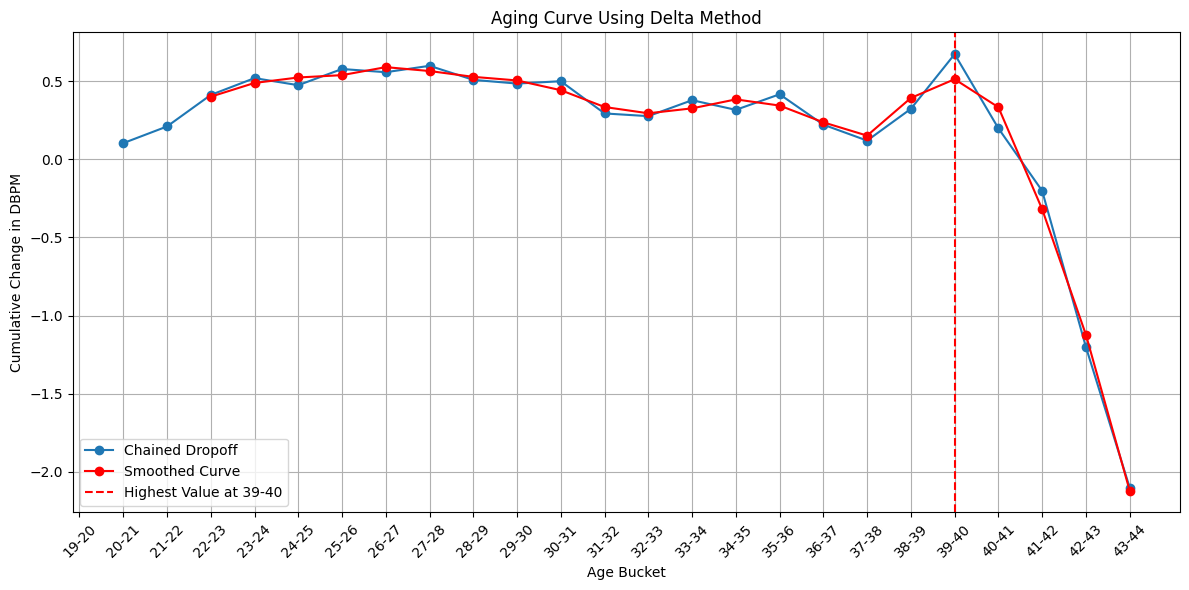

,Age_Bucket,DBPM_Delta,Chained_Dropoff,Smoothed_Chained_Dropoff
0,19-20,NaN,NaN,NaN
1,20-21,0.103774,0.103774,NaN
2,21-22,0.106767,0.210541,NaN
3,22-23,0.201923,0.412464,0.401270
4,23-24,0.107728,0.520192,0.489286
5,24-25,-0.045230,0.474962,0.524230
6,25-26,0.103616,0.578578,0.539269
7,26-27,-0.020526,0.558052,0.590447
8,27-28,0.040947,0.598999,0.565634
9,28-29,-0.089904,0.509095,0.528307


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Calculate BPM Delta for each player
df['DBPM_Delta'] = df.groupby('Player')['DBPM'].diff()

# Create Age Buckets that show the age going into the age
# For example, a player's transition from 19 to 20 will have a bucket '19-20'
df['Age_Bucket'] = df['Age'].astype(str) + '-' + (df['Age'] + 1).astype(str)

# Calculate average Delta per Bucket
bucket_averages = df.groupby('Age_Bucket')['DBPM_Delta'].mean().reset_index()

# Calculate the cumulative sum of the average BPM deltas
bucket_averages['Chained_Dropoff'] = bucket_averages['DBPM_Delta'].cumsum()

# Now let's handle the smoothing
window_length = 5  # Choose a window length that makes sense for your data, must be odd
polyorder = 3  # Choose a polynomial order that makes sense for your data

# Ensure that we have enough points to apply the smoothing filter
if len(bucket_averages) >= window_length:
    bucket_averages['Smoothed_Chained_Dropoff'] = savgol_filter(bucket_averages['Chained_Dropoff'], window_length, polyorder)
else:
    bucket_averages['Smoothed_Chained_Dropoff'] = bucket_averages['Chained_Dropoff']

# Plot the Aging Curve
plt.figure(figsize=(12, 6))
plt.plot(bucket_averages['Age_Bucket'], bucket_averages['Chained_Dropoff'], marker='o', linestyle='-', label='Chained Dropoff')
plt.plot(bucket_averages['Age_Bucket'], bucket_averages['Smoothed_Chained_Dropoff'], marker='o', linestyle='-', color='red', label='Smoothed Curve')
plt.xlabel('Age Bucket')
plt.ylabel('Cumulative Change in DBPM')
plt.title('Aging Curve Using Delta Method')
plt.grid(True)
plt.xticks(rotation=45)

# Add a vertical line for the age bucket where the highest value occurs
max_index = bucket_averages['Chained_Dropoff'].idxmax()
max_age_bucket = bucket_averages['Age_Bucket'][max_index]
plt.axvline(x=max_age_bucket, color='red', linestyle='--', label=f'Highest Value at {max_age_bucket}')
plt.tight_layout()  # Ensure everything fits without overlapping
plt.legend()
plt.show()

# Display the first few rows of bucket_averages to confirm the '19-20' bucket is included
bucket_averages

#VORP

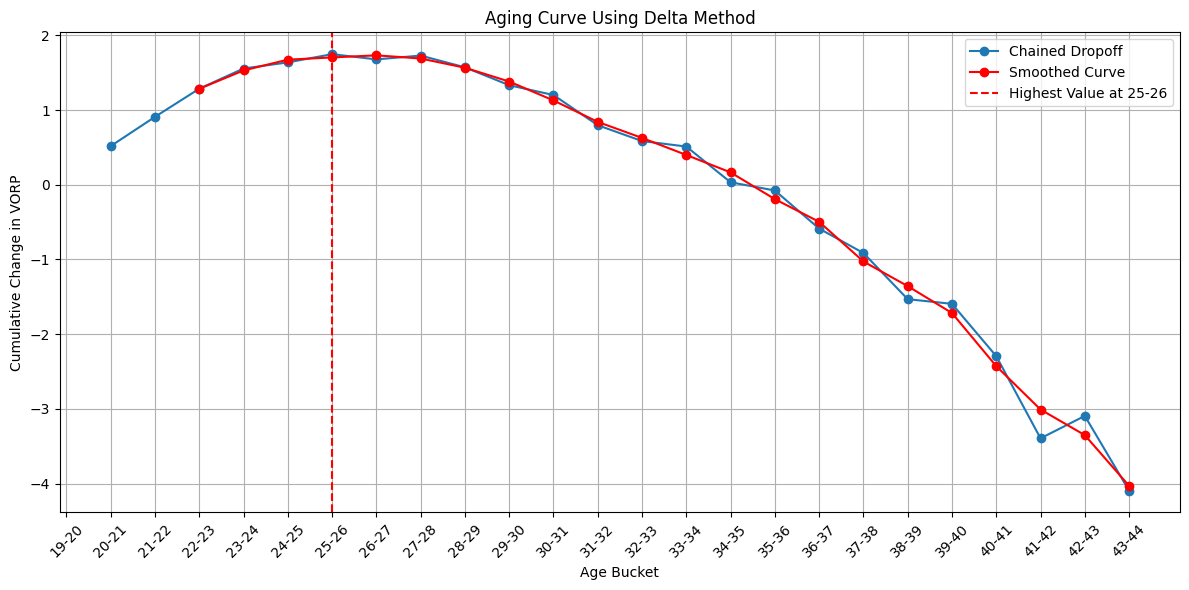

,Age_Bucket,VORP_Delta,Chained_Dropoff,Smoothed_Chained_Dropoff
0,19-20,NaN,NaN,NaN
1,20-21,0.516981,0.516981,NaN
2,21-22,0.391353,0.908335,NaN
3,22-23,0.376648,1.284983,1.284160
4,23-24,0.270296,1.555279,1.529650
5,24-25,0.081897,1.637175,1.673706
6,25-26,0.110452,1.747627,1.703781
7,26-27,-0.070234,1.677393,1.731619
8,27-28,0.051379,1.728772,1.689609
9,28-29,-0.157340,1.571432,1.565960


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Calculate BPM Delta for each player
df['VORP_Delta'] = df.groupby('Player')['VORP'].diff()

# Create Age Buckets that show the age going into the age
# For example, a player's transition from 19 to 20 will have a bucket '19-20'
df['Age_Bucket'] = df['Age'].astype(str) + '-' + (df['Age'] + 1).astype(str)

# Calculate average Delta per Bucket
bucket_averages = df.groupby('Age_Bucket')['VORP_Delta'].mean().reset_index()

# Calculate the cumulative sum of the average BPM deltas
bucket_averages['Chained_Dropoff'] = bucket_averages['VORP_Delta'].cumsum()

# Now let's handle the smoothing
window_length = 5  # Choose a window length that makes sense for your data, must be odd
polyorder = 3  # Choose a polynomial order that makes sense for your data

# Ensure that we have enough points to apply the smoothing filter
if len(bucket_averages) >= window_length:
    bucket_averages['Smoothed_Chained_Dropoff'] = savgol_filter(bucket_averages['Chained_Dropoff'], window_length, polyorder)
else:
    bucket_averages['Smoothed_Chained_Dropoff'] = bucket_averages['Chained_Dropoff']

# Plot the Aging Curve
plt.figure(figsize=(12, 6))
plt.plot(bucket_averages['Age_Bucket'], bucket_averages['Chained_Dropoff'], marker='o', linestyle='-', label='Chained Dropoff')
plt.plot(bucket_averages['Age_Bucket'], bucket_averages['Smoothed_Chained_Dropoff'], marker='o', linestyle='-', color='red', label='Smoothed Curve')
plt.xlabel('Age Bucket')
plt.ylabel('Cumulative Change in VORP')
plt.title('Aging Curve Using Delta Method')
plt.grid(True)
plt.xticks(rotation=45)
# Add a vertical line for the age bucket where the highest value occurs
max_index = bucket_averages['Chained_Dropoff'].idxmax()
max_age_bucket = bucket_averages['Age_Bucket'][max_index]
plt.axvline(x=max_age_bucket, color='red', linestyle='--', label=f'Highest Value at {max_age_bucket}')
plt.tight_layout()  # Ensure everything fits without overlapping
plt.legend()
plt.show()

# Display the first few rows of bucket_averages to confirm the '19-20' bucket is included
bucket_averages

#Certain position aging curve code
#Take "Center" as an example

In [ ]:
center_df = pd.read_csv('../drive/MyDrive/Colab Notebooks/sports_hw/Centersnew2.csv')

In [ ]:
center_df

,Player,Age,Rk,Pos,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Myles Turner,19,433.0,C,60,30,1367,264.0,530.0,0.4980,...,10.30,20.9,0.80,2.3,3.10,0.1090,-2.20,0.60,-1.6,0.10
1,Jaxson Hayes,19,210.0,C,64,14,1080,174.0,259.0,0.6720,...,13.40,15.0,2.80,1.1,3.90,0.1710,-0.90,0.60,-0.3,0.50
2,Isaiah Stewart,19,469.0,C,68,14,1455,226.0,409.0,0.5530,...,13.00,15.5,1.90,2.1,4.00,0.1320,-1.60,0.50,-1.1,0.30
3,Andre Drummond,19,115.0,C,60,10,1243,208.0,342.0,0.6080,...,12.20,17.2,2.20,2.3,4.50,0.1720,1.00,1.50,2.5,1.40
4,Thon Maker,19,281.0,C,57,34,562,83.0,181.0,0.4590,...,7.70,17.8,0.80,0.5,1.30,0.1130,-1.10,-0.90,-2.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Pau Gasol*,37,172.0,C,77,63,1812,287.0,627.0,0.4580,...,13.10,20.4,2.70,3.3,6.00,0.1590,1.50,1.90,3.4,2.50
616,Pau Gasol*,38,182.0,C,30,6,360,21.0,47.0,0.3165,...,17.15,14.1,0.25,0.3,0.55,0.0485,-1.85,1.45,-0.4,0.25
617,Tim Duncan*,38,137.0,C,77,77,2227,419.0,819.0,0.5120,...,12.10,22.2,4.90,4.7,9.60,0.2070,2.30,2.80,5.1,4.00
618,Dirk Nowitzki*,39,372.0,C,77,77,1900,346.0,758.0,0.4560,...,6.00,20.5,2.60,2.2,4.80,0.1210,1.70,0.60,2.3,2.10


In [ ]:
# Sort the DataFrame by player and age to ensure that the deltas are calculated correctly
df = center_df.sort_values(by=['Player', 'Age'])

#AST

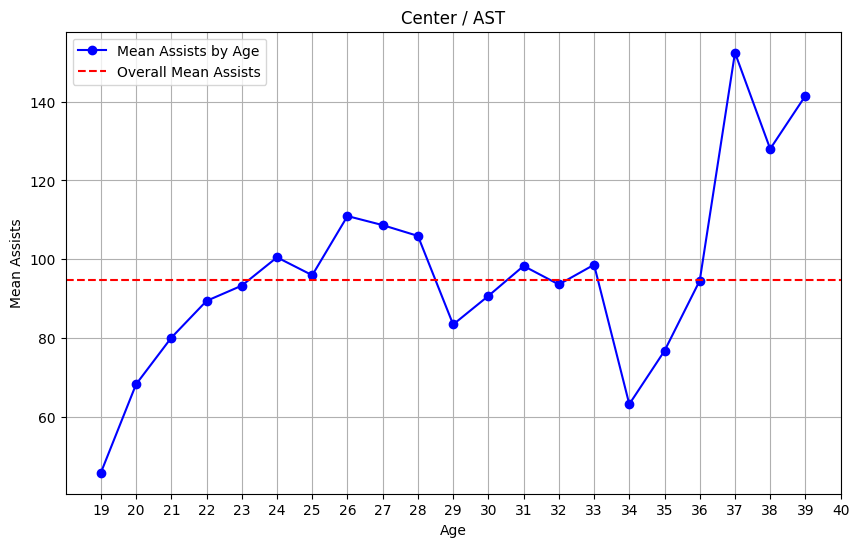

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'AST' and 'Age' are the column names in your DataFrame df
mean_ast_by_age = df.groupby('Age')['AST'].mean()

# Calculate overall mean assists
overall_mean_ast = df['AST'].mean()

# Generate a range of ages from 19 to 40
all_ages = range(19, 41)

plt.figure(figsize=(10, 6))
plt.plot(mean_ast_by_age.index, mean_ast_by_age.values, marker='o', linestyle='-', label='Mean Assists by Age', color='blue')  # Adjust color here
plt.axhline(y=overall_mean_ast, color='red', linestyle='--', label='Overall Mean Assists')
plt.title('Center / AST')
plt.xlabel('Age')
plt.ylabel('Mean Assists')
plt.xticks(all_ages)  # Set x-ticks to ensure all ages from 19 to 40 are displayed
plt.legend()  # Add legend to the plot
plt.grid(True)
plt.show()

Here is survivorship bias

In [ ]:
filtered_df = center_df[center_df['Age'] == 37][['Player', 'Age','Pos',	'G', 'AST', 'TRB', 'BLK']]
filtered_df

,Player,Age,Pos,G,AST,TRB,BLK
609,David West,37,C,73,138.0,238.0,75.0
610,LeBron James,37,C,56,349.0,459.0,59.0
611,Tim Duncan*,37,C,74,220.0,721.0,139.0
612,Chris Andersen,37,C,27,6.0,49.0,6.5
613,Kevin Garnett*,37,C,54,82.0,358.0,40.0
614,Taj Gibson,37,C,49,34.0,93.0,12.0
615,Pau Gasol*,37,C,77,238.0,619.0,79.0


# DRB

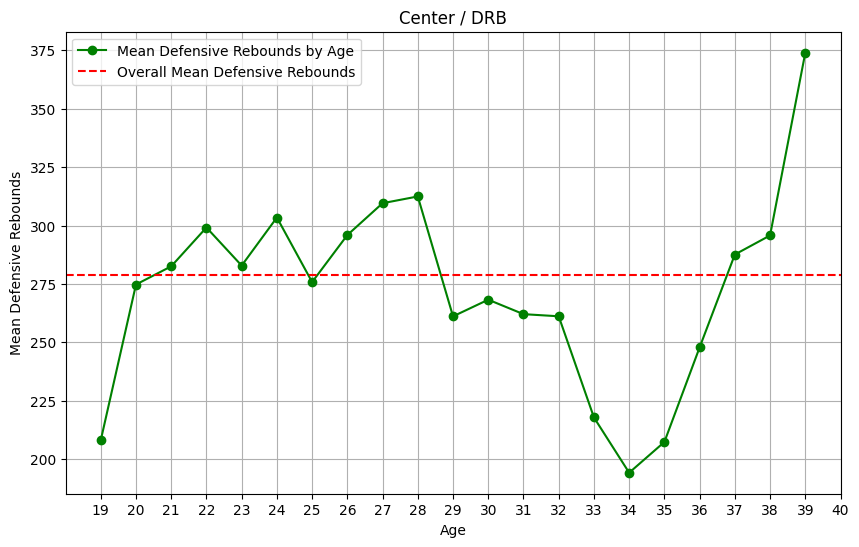

In [ ]:
# Assuming 'DRB' and 'Age' are the column names in your DataFrame df
mean_drb_by_age = df.groupby('Age')['DRB'].mean()

# Calculate overall mean total rebounds
overall_mean_drb = df['DRB'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_drb_by_age.index, mean_drb_by_age.values, marker='o', linestyle='-', label='Mean Defensive Rebounds by Age', color='green')
plt.axhline(y=overall_mean_drb, color='red', linestyle='--', label='Overall Mean Defensive Rebounds')
plt.title('Center / DRB')
plt.xlabel('Age')
plt.ylabel('Mean Defensive Rebounds')
plt.xticks(all_ages)
plt.legend()
plt.grid(True)
plt.show()

# FT

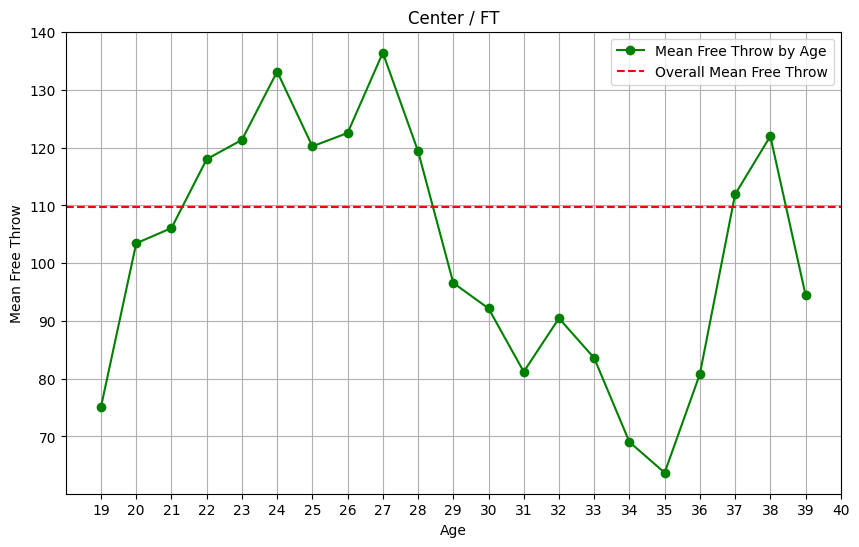

In [ ]:
# Assuming 'FT' and 'Age' are the column names in your DataFrame df
mean_ft_by_age = df.groupby('Age')['FT'].mean()

# Calculate overall mean total rebounds
overall_mean_ft = df['FT'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_ft_by_age.index, mean_ft_by_age.values, marker='o', linestyle='-', label='Mean Free Throw by Age', color='green')
plt.axhline(y=overall_mean_ft, color='red', linestyle='--', label='Overall Mean Free Throw')
plt.title('Center / FT')
plt.xlabel('Age')
plt.ylabel('Mean Free Throw')
plt.xticks(all_ages)
plt.legend()
plt.grid(True)
plt.show()

# AST, DRB, FT with delta method

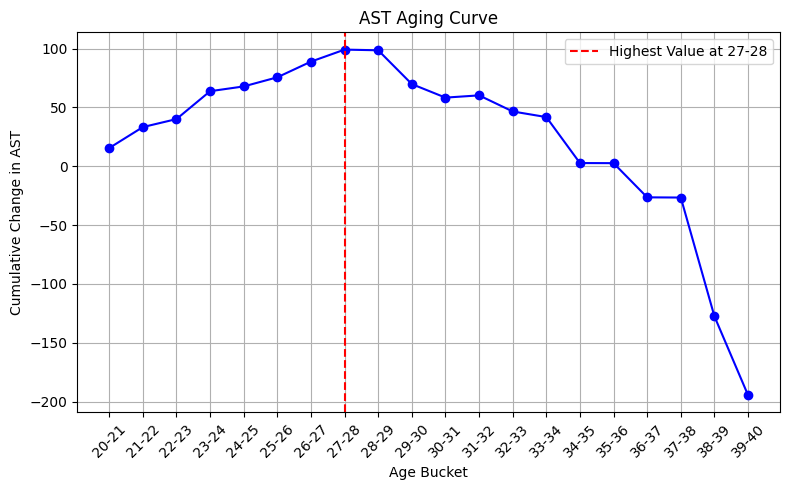

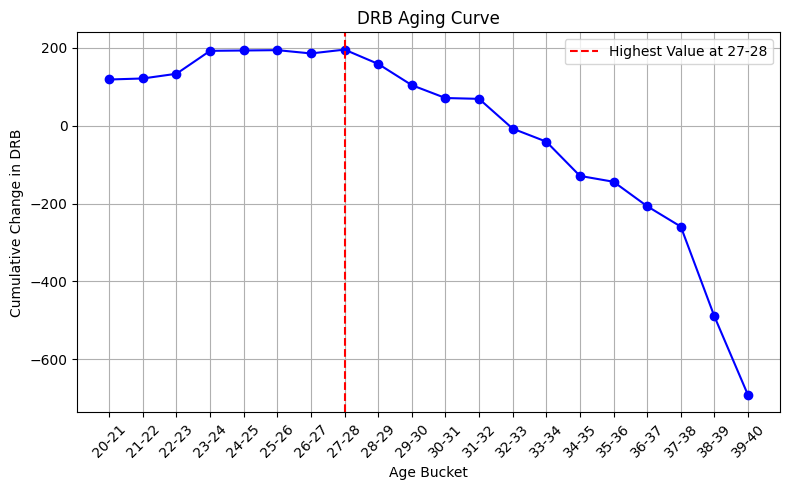

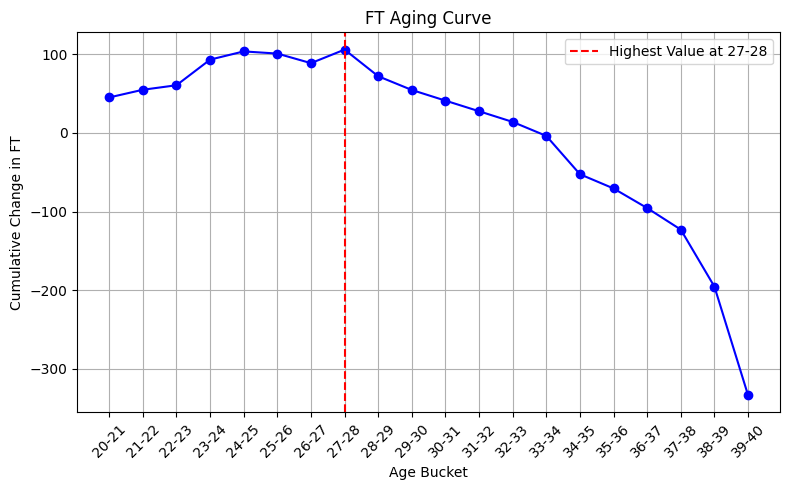

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate deltas for each metric
metrics = ['AST','DRB', 'FT']
for metric in metrics:
    df[f'{metric}_Delta'] = df.groupby('Player')[metric].diff()

# Create Age Buckets
df['Age_Bucket'] = df['Age'].astype(str) + '-' + (df['Age'] + 1).astype(str)

# Calculate average Delta per Bucket for each metric
bucket_averages = {}
for metric in metrics:
    bucket_averages[metric] = df.groupby('Age_Bucket')[f'{metric}_Delta'].mean().reset_index()
    bucket_averages[metric]['Chained_Dropoff'] = bucket_averages[metric][f'{metric}_Delta'].cumsum()

# Plot the Aging Curves for each metric on separate graphs
for metric in metrics:
    plt.figure(figsize=(8, 5))
    plt.plot(bucket_averages[metric]['Age_Bucket'], bucket_averages[metric]['Chained_Dropoff'], marker='o', linestyle='-', color='b')
    plt.xlabel('Age Bucket')
    plt.ylabel(f'Cumulative Change in {metric}')
    plt.title(f'{metric} Aging Curve')
    plt.grid(True)
    plt.xticks(rotation=45)
     # Find the index of the maximum value
    max_index = bucket_averages[metric]['Chained_Dropoff'].idxmax()
    max_age_bucket = bucket_averages[metric]['Age_Bucket'][max_index]

    # Add a vertical line to indicate the age bucket where the highest value occurs
    plt.axvline(x=max_age_bucket, color='r', linestyle='--', label=f'Highest Value at {max_age_bucket}')
    plt.tight_layout()
    plt.legend()
    plt.show()